***Installing Required Libraries***

In [1]:
!pip install -q opencv-python-headless

***Downloading the Dataset***

In [2]:
import kagglehub
path = kagglehub.dataset_download("awsaf49/coco-2017-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coco-2017-dataset' dataset.
Path to dataset files: /kaggle/input/coco-2017-dataset


***Input Path***

In [9]:
import os, glob, cv2, numpy as np, matplotlib.pyplot as plt
DataSet = '/kaggle/input/coco-2017-dataset/coco2017/val2017'
TARGET_SIZE = (512, 512)
No_Img = 6

***Resize and Normalization***

In [10]:
MEAN = np.array([0.485, 0.456, 0.406], dtype=np.float32)
STD  = np.array([0.229, 0.224, 0.225], dtype=np.float32)

def load_rgb(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def resize_and_normalize(img_rgb, target_size):
    h, w = target_size
    img = cv2.resize(img_rgb, (w, h), interpolation=cv2.INTER_AREA)
    img = img.astype(np.float32) / 255.0
    norm = (img - MEAN) / STD
    return norm


***Displaying Results***

Displaying 6 pairs. Resize target = (512, 512)


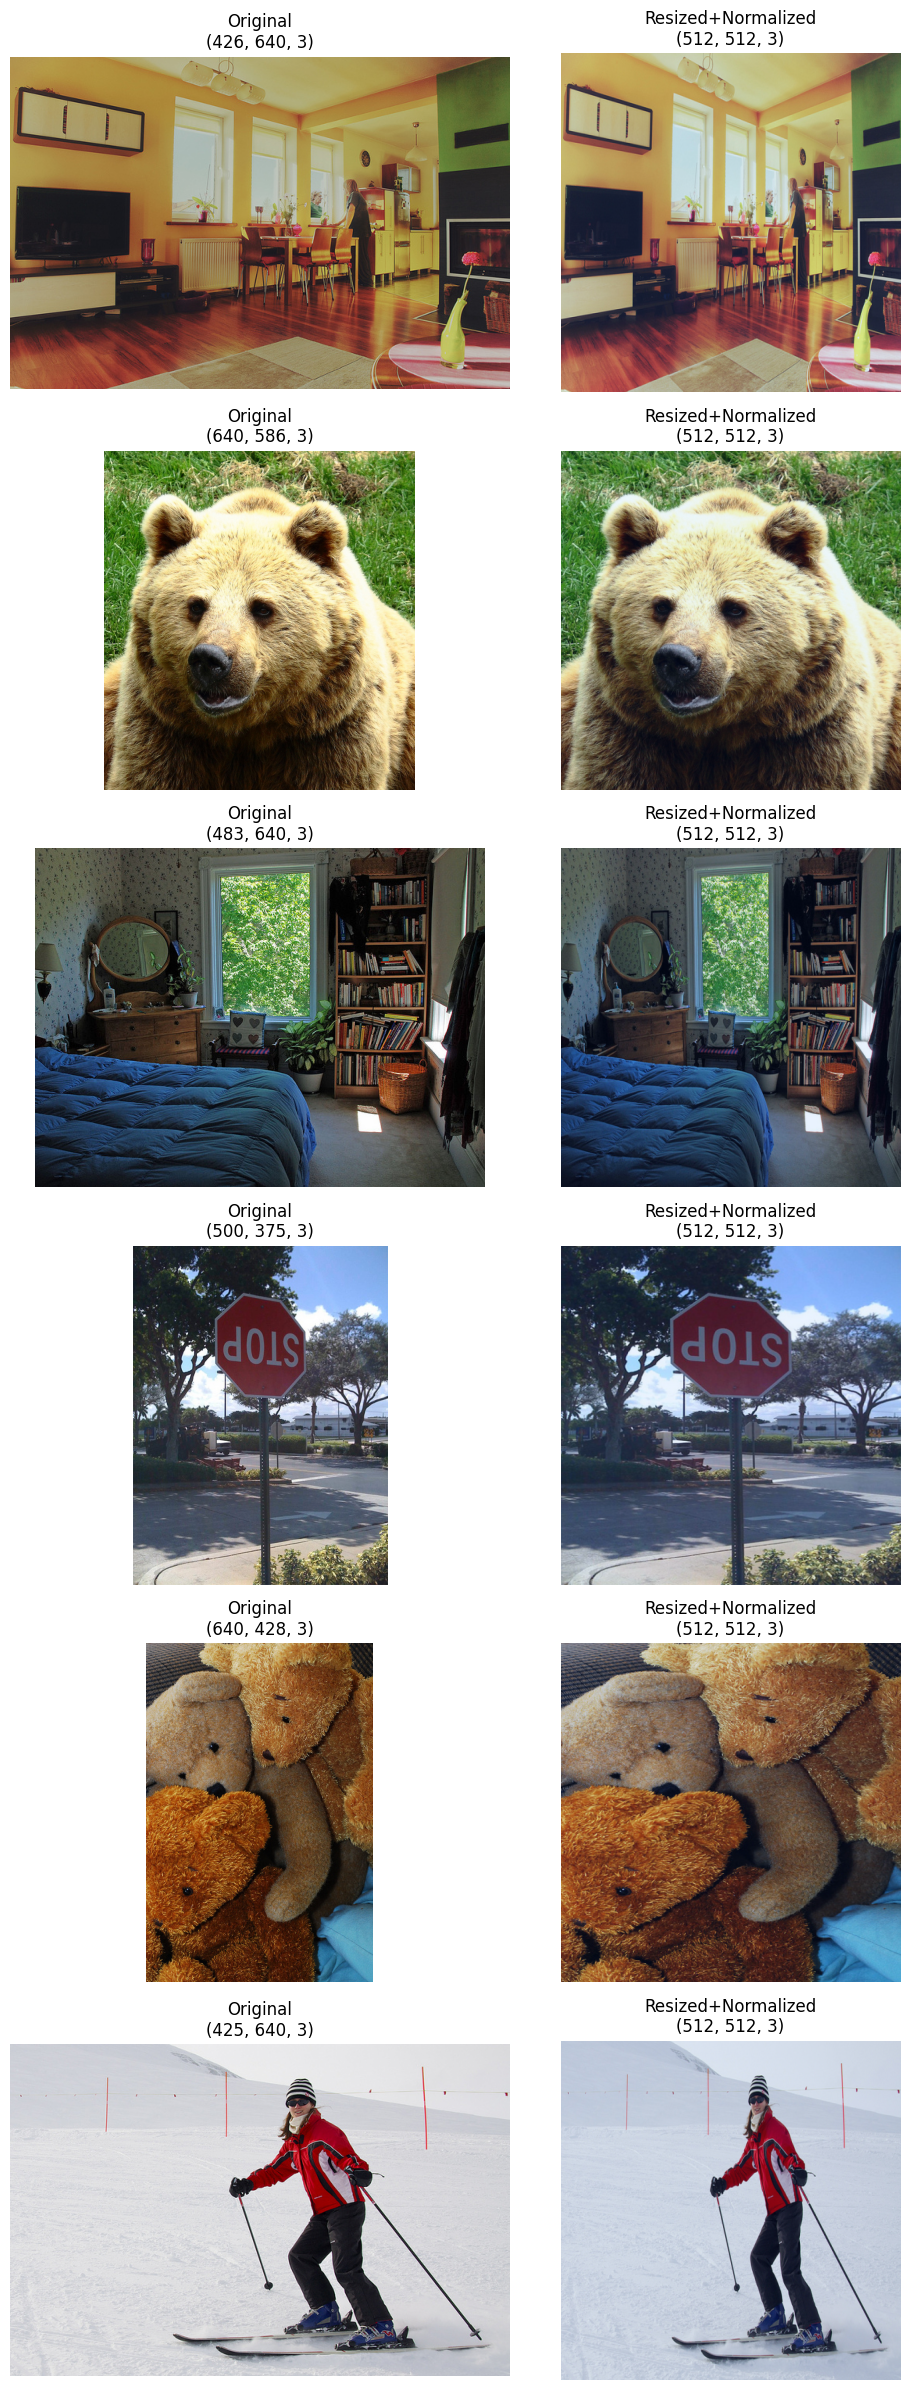

In [12]:
jpg_files = sorted(glob.glob(os.path.join(DataSet, '*.jpg')))
files = jpg_files[:No_Img]

print(f"Displaying {len(files)} pairs. Resize target = {TARGET_SIZE}")
fig, axes = plt.subplots(len(files), 2, figsize=(10, 4 * len(files)))
axes = np.array(axes).reshape(len(files), 2)

for i, path in enumerate(files):
        img = load_rgb(path)
        proc = resize_and_normalize(img, TARGET_SIZE)
        proc_disp = (proc - proc.min()) / (proc.max() - proc.min() + 1e-8)

        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"Original\n{img.shape}")
        axes[i, 0].axis("off")
        axes[i, 1].imshow(proc_disp)
        axes[i, 1].set_title(f"Resized+Normalized\n{proc.shape}")
        axes[i, 1].axis("off")

plt.tight_layout()
plt.show()



